In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
# nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud 
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 
import pickle 
import re

In [3]:
!pip install wordcloud

In [4]:
!pip install xgboost

In [5]:
data = pd.read_csv(r"archive\amazon_alexa.tsv",delimiter = '\t', quoting = 3)
print(f"Dataset shape: {data.shape}")

Dataset shape: (3150, 5)


In [6]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
print(f"Feature names: {data.columns.values}")

Feature names: ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [8]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [9]:
data[data['verified_reviews'].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [10]:
data.dropna(inplace = True)
print(f"Dataset shape after dropping numm values: {data.shape}")

Dataset shape after dropping numm values: (3149, 5)


In [12]:
data['length'] = data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [13]:
#random code to check if our new length column and review column value is same or not!
print(f"verified reviws column value: {data.iloc[5]['verified_reviews']}")
print(f"length of review: {len(data.iloc[5]['verified_reviews'])}")
print(f"length of variation: {len(data.iloc[5]['variation'])}")
print(f"length column value: {data.iloc[5]['length']}")

verified reviws column value: "I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do."
length of review: 174
length of variation: 20
length column value: 174


In [14]:
data.dtypes
# to know which column has which datatype specified

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [18]:
# distinguish the number of ratings for each rating value
print(f"Rating value count:\n{data['rating'].value_counts()}")

Rating value count:
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


In [19]:
len(data)

3149

In [21]:
print(f"Rating value count - percentage distribution:\n{round(data['rating'].value_counts()/data.shape[0]*110,2)}")

Rating value count - percentage distribution:
rating
5    79.85
4    15.89
1     5.62
3     5.31
2     3.32
Name: count, dtype: float64


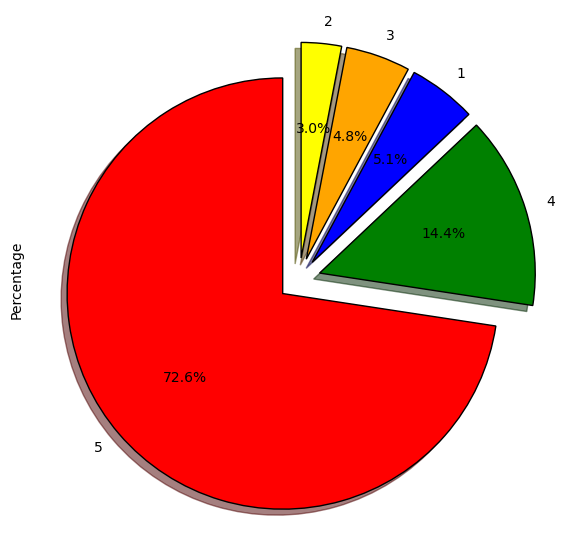

In [22]:
#pie-chart 
fig = plt.figure(figsize=(7,7))
colors = ('red','green','blue','orange','yellow')
wp ={'linewidth':1, 'edgecolor':'black'}
tags = data['rating'].value_counts()/data.shape[0]
explode = (0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow = True, colors=colors, startangle=90, wedgeprops=wp, explode= explode, label='Percentage')
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [23]:
#feedback positive and negative
print(f"Feedback value count:\n{data['feedback'].value_counts()}")

Feedback value count:
feedback
1    2893
0     256
Name: count, dtype: int64


In [26]:
review_0 = data[data['feedback'] == 0].iloc[3]['verified_reviews']
print(review_0)

"Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?"


In [27]:
review_1 = data[data['feedback'] == 1].iloc[3]['verified_reviews']
print(review_1)

"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."


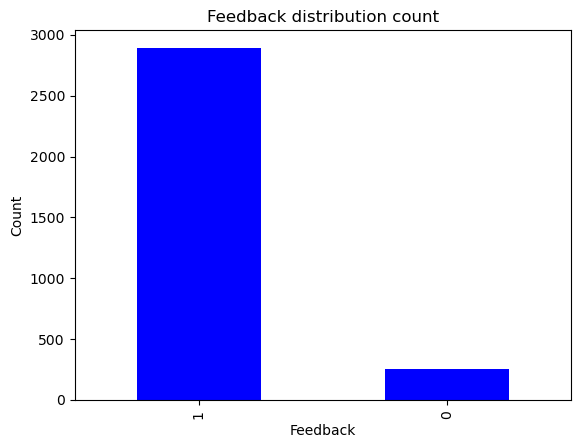

In [28]:
#plot graph
data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()